<a href="https://colab.research.google.com/github/dani-lbnl/mudit/blob/main/Topic_Modeling_Top2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Installation

In [1]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

     |████████████████████████████████| 34.5 MB 14 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.51.2 requires llvmlite<0.35,>=0.34.0.dev0, but you have llvmlite 0.38.0 which is incompatible.
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-2i2acnfp/hdbscan_b99cf37beda5437fa9e61028f657f036
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-2i2acnfp/hdbscan_b99cf37beda5437fa9e61028f657f036
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330858 

In [2]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

## Top2Vec on pubs.xlsx

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_table('/content/drive/MyDrive/LBNL/Pubs.xls')
abstracts = list(df[~df['Abstract'].isna()]['Abstract'])

# corpus_abs, id2word_abs, words_abs = preprocess_lda(abstracts)

In [7]:
# for title
indices = df['Title'].isna()
df.loc[indices,'Title'] = ""

# for abstract
indices = df['Abstract'].isna()
df.loc[indices,'Abstract'] = ""

# combined - title + abstract
df['Combined'] = df['Title'] + " " + df['Abstract']
combined = list(df['Combined'])

In [9]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_reviews = Top2Vec(documents=combined, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-03-15 09:59:51,553 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-15 09:59:52,016 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-03-15 10:00:08,994 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-15 10:00:10,059 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

Total time taken (mins):  0


In [10]:
# show the total number of topics
model_reviews.get_num_topics() 

3

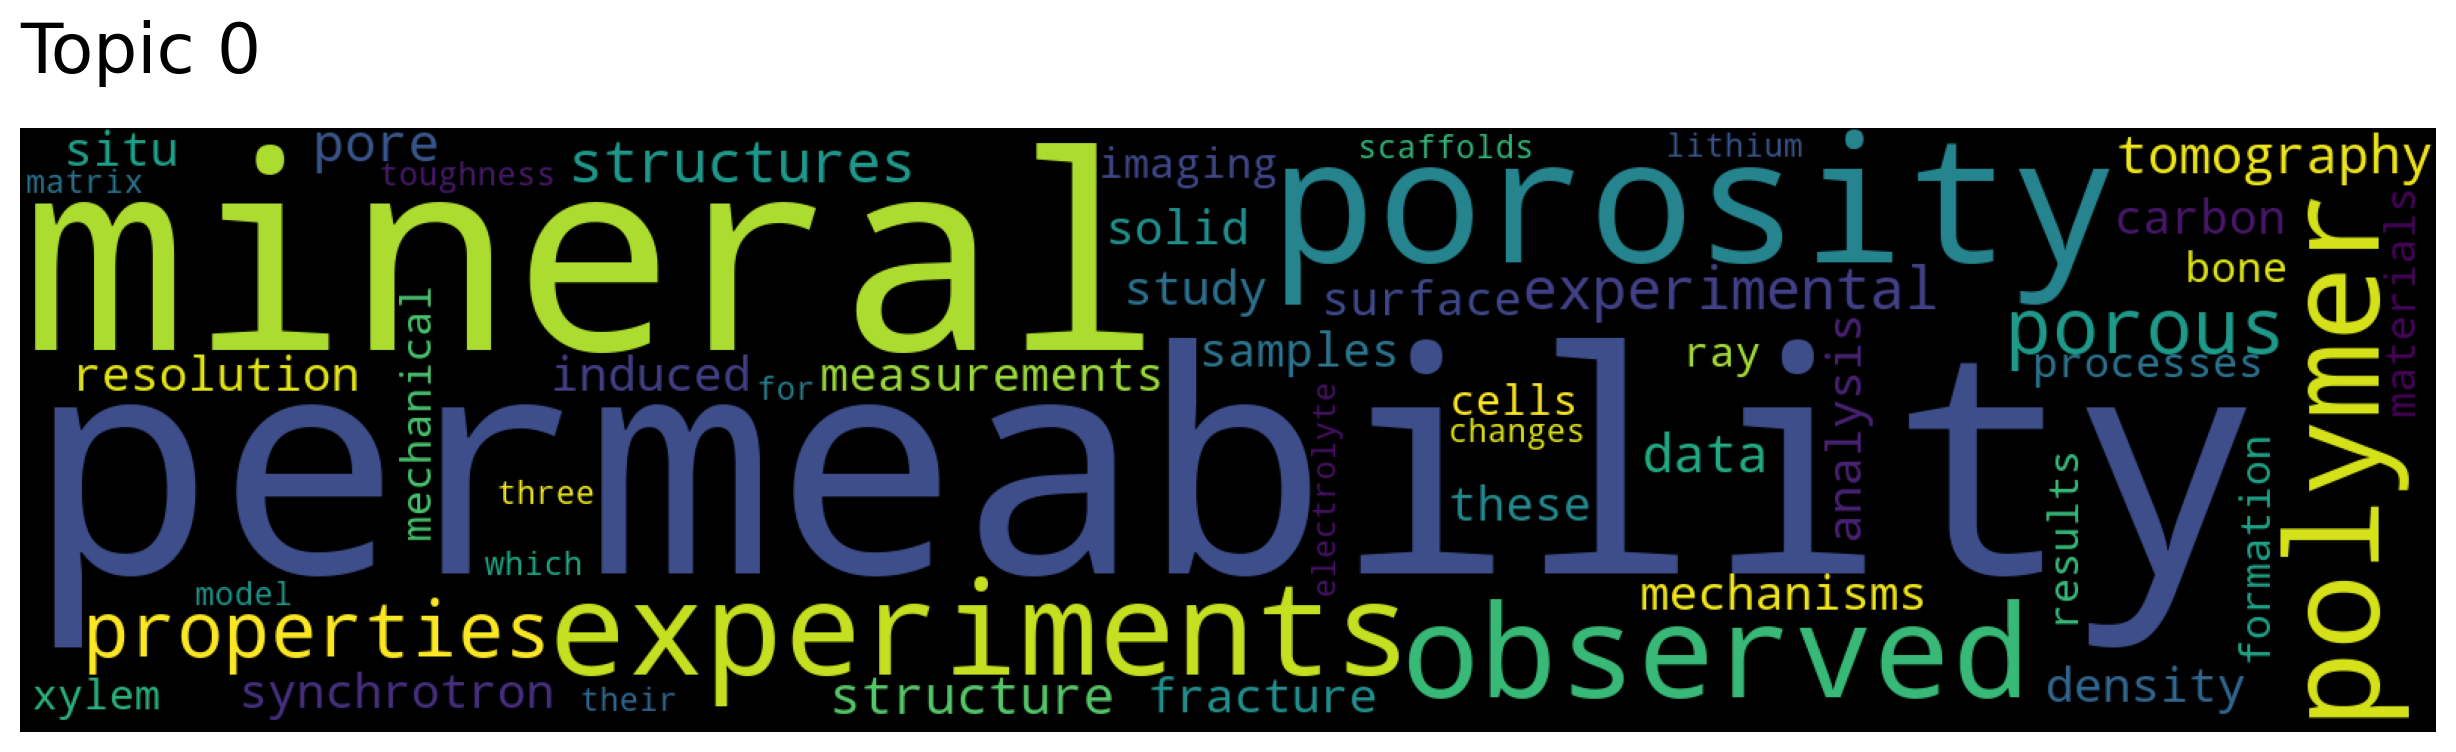

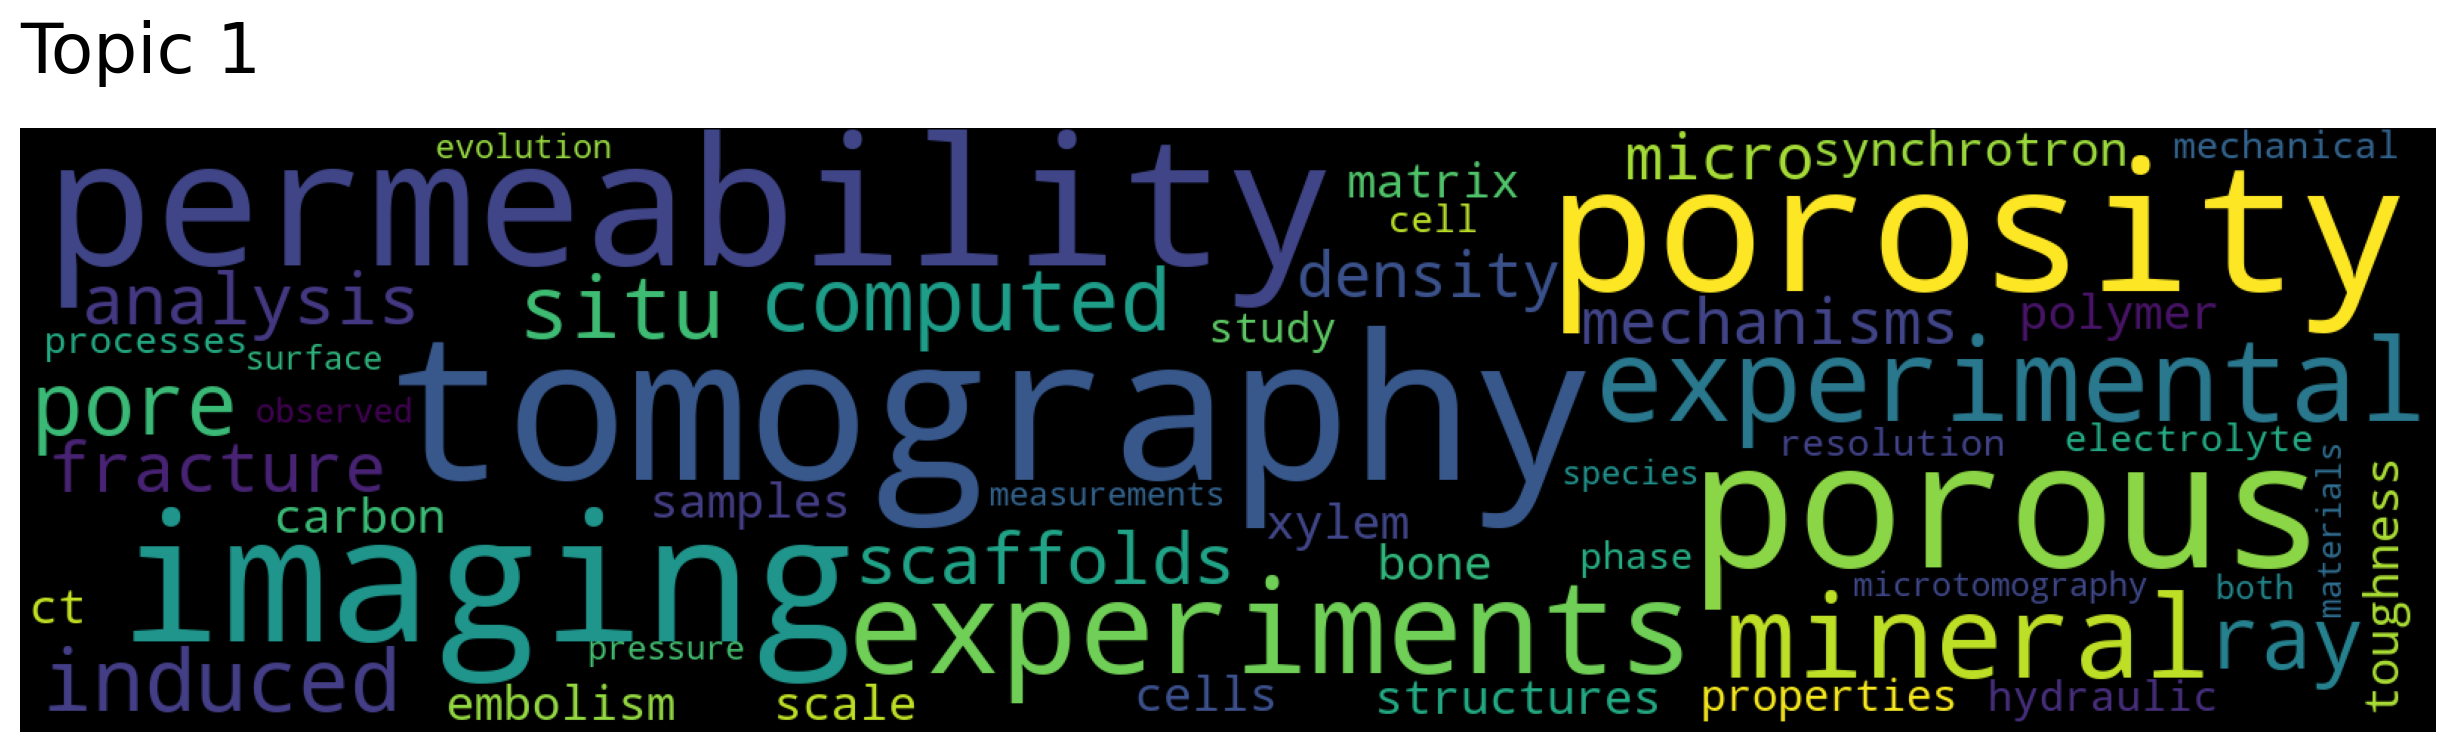

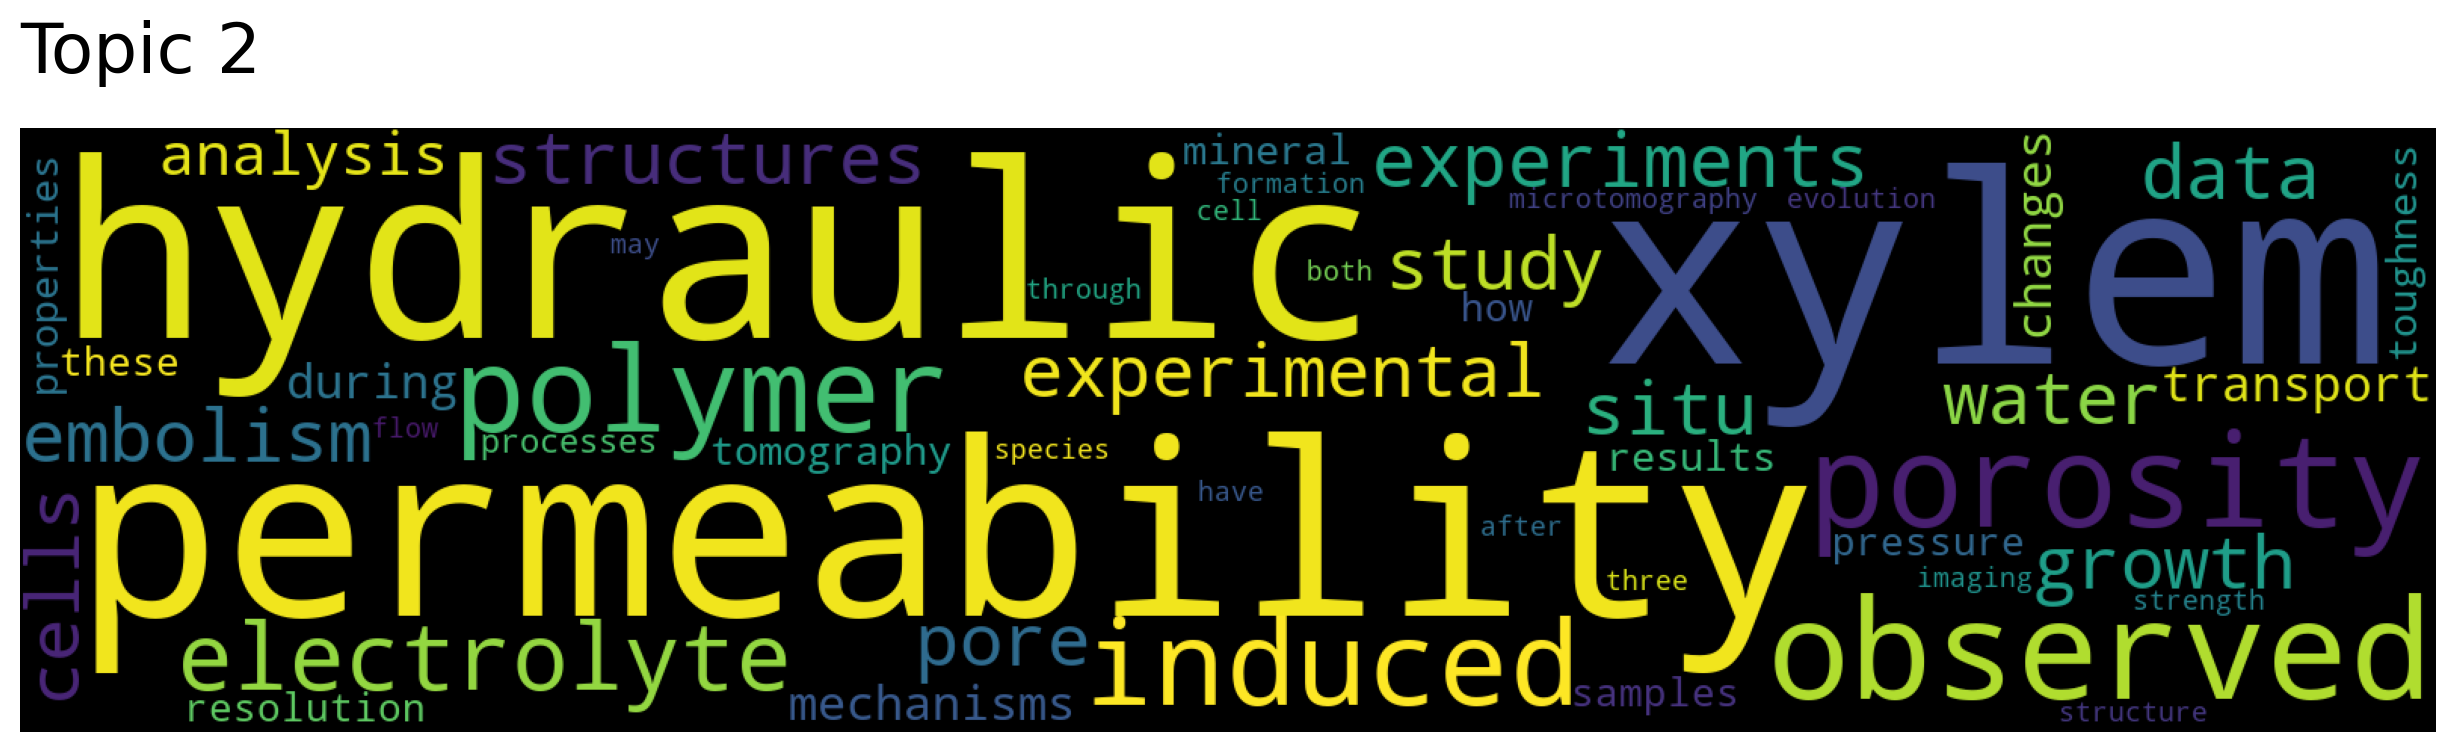

In [11]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:5]:
    model_reviews.generate_topic_wordcloud(topic)

In [12]:
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.68960040807724
-----------
Pore-scale multiphase flow modeling and imaging of CO[d2] exsolution in Sandstone 
-----------

Document: 238, Score: 0.6663891077041626
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 370, Score: 0.6642225384712219
-----------
Pore-scale and topology analysis of flame stabilization inside inert porous media using X-ray microtomography 
-----------

Document: 302, Score: 0.6610965728759766
-----------
Micro-Scale Analysis of Liquid Water Breakthrough inside Gas Diffusion Layer for PEMFC Using X-ray Computed Tomography and Lattice Boltzmann Method 
-----------

Document: 275, Score: 0.6594441533088684
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------



In [14]:
# search doc by keywords
documents, document_scores, document_ids = model_reviews.search_documents_by_keywords(keywords=["batteries"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

ValueError: ignored

In [16]:
words, word_scores = model_reviews.similar_words(keywords=["battery"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ValueError: ignored